# Advanced topics in User Interfaces

# 1. Virtual Environments and Packages

## **Learning goals:** 

1.   to get necessary software installed
2.   to learn what is a virtual enviroment, how and why to use it
3.   to learn a popular deep learning framework TensorFlow
4.   to get introduced with MNIST dataset



### 1.1 Introduction
Python applications will often use packages and modules that don’t come as part of the standard library. Applications will sometimes need a specific version of a library, because the application may require that a particular bug has been fixed or the application may be written using an obsolete version of the library’s interface.

This means it may not be possible for one Python installation to meet the requirements of every application. If application A needs version 1.0 of a particular module but application B needs version 2.0, then the requirements are in conflict and installing either version 1.0 or 2.0 will leave one application unable to run.

The solution for this problem is to create a virtual environment, a self-contained directory tree that contains a Python installation for a particular version of Python, plus a number of additional packages.

Different applications can then use different virtual environments. To resolve the earlier example of conflicting requirements, application A can have its own virtual environment with version 1.0 installed while application B has another virtual environment with version 2.0. If application B requires a library be upgraded to version 3.0, this will not affect application A’s environment. More information can be found [here](https://docs.python.org/3/tutorial/venv.html).

### 1.2. Create environment

#### 1.2.1. Prerequisites
The following instructions assume that you have already have Python and Anaconda installed on your machine. If it is not so, please, check the following links how to install these software since they are required to complete this tutorial. If you have problems installation, you can always contact me otorrent@mail.ru.

[Python 3.0+](https://realpython.com/installing-python/)

[Anaconda ](https://www.anaconda.com/distribution/)


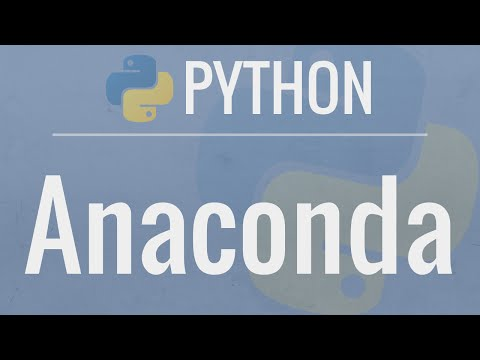

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('YJC6ldI3hWk')

#### 1.2.2. Enviroment Initialization
We start our tutorial with introduction to *environments*. Creating environments prevents many errors including contradictions between libraries, bugs in recently updated libratries, problems with migrations and many more. It is a good habit to create a separate environment for each project.

PIP is already installed if you are using Python 3 >=3.4 downloaded from python.org or if you are working in a Virtual Environment created by virtualenv or pyvenv. Just make sure to upgrade pip. If it is not the case, download pip from the [link.](https://bootstrap.pypa.io/), then you can run following command in the COMAND PROMPT.

In [0]:
!cd /path/to/downloadsfolder

!python get-pip.py

Now you can use pip command, let's try it with installation of the environment library.

In [0]:
!pip install virtualenv

     |████████████████████████████████| 3.4MB 9.4MB/s 


You have just installed library [virtualenv](https://virtualenv.pypa.io/en/latest/) which allows you to create environments as follows:

In [0]:
!virtualenv myfirstenvironment

Using base prefix '/usr'
New python executable in /content/myfirstenvironment/bin/python3
Also creating executable in /content/myfirstenvironment/bin/python
Installing setuptools, pip, wheel...
done.


It is more convininent to give environments names which you will remember in the future, here we called envrironment 'myfirstenvironment', but you can give any name you want. 

After we create the environment (which is simply like creating a folder on your laptop) you should activate it.

In [0]:
!source myfirstenvironment/bin/activate

Now, you can install any package you want to the environment. For instance, you can install [numpy](https://numpy.org/doc/) - a very popular library for working with vectors.

In [0]:
!pip install numpy

Make sure to create a record of everything that’s installed in your new environment by running:

In [0]:
!pip freeze > requirements.txt

By creating requirements.txt file you save the current version of your environment and everything has been installed into it. 

It is important to have several versions of your environment as a backup. In case you receive an error you can always go back to the previous version.

####  1.2.3. Alternative version of creating environments using PipEnv

This method is just an alternative to everything we have discussed above.

The difference is that the workflow is simplified by not seperating the process of creating a new environment from scratch vs creating with a existing file.

In [0]:
!pip install pipenv

     |████████████████████████████████| 5.2MB 9.8MB/s 


In [0]:
!pipenv install

In [0]:
!pipenv shell 

In [0]:
!pip install numpy

#### 1.2.4. Anaconda environment
Anaconda is a distribution of python that makes it super simple to install packages. 

Anaconda also has their own virtual environment system called conda. Make sure you have installed Anaconda before running the code below.

To create an environment call this command:

In [0]:
!conda create --name myfirstenvironment python=3.7

You can save all the info necessary to recreate the environment in a file by calling:

In [0]:
!conda env export > myfirstenvironment.yml

To recreate the environment you can do the following:

In [0]:
!conda env create -f myfirstenvironment.yml

Now, you know how and, more important, why we need to create environments. 

Let's talk about the main library we are going to use in this course.

# 2. TensorFlow

The following code provides an overview on the most popular library for deep learning - TensorFlow. 

The new version of it was released this summer and became more friendly to use comparing with the previous version.

To Download and install the TensorFlow 2 package - import TensorFlow into your program:

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow

import tensorflow as tf

### 2.1 Load the data

[MNIST](http://yann.lecun.com/exdb/mnist/) dataset has 70k small grayscale images.

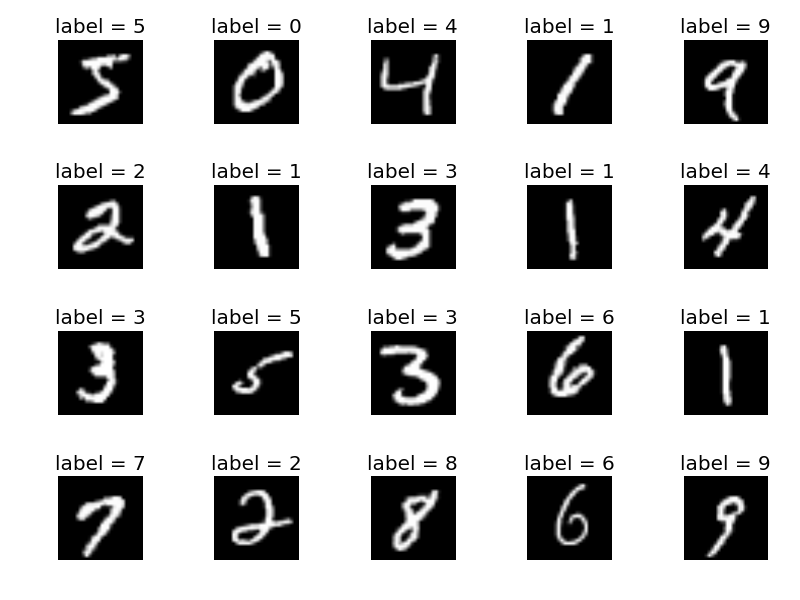

In [0]:
Image('mnist_plot-800x600.png')

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### 2.2. Build the model

Build the [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model by stacking layers. 
Task: Define the model: Choose network architecture.

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Images are 28x28 px
  tf.keras.layers.Dense(128, activation='relu'), # Hidden layer
  tf.keras.layers.Dropout(0.2),                  # Normalization layer
  tf.keras.layers.Dense(10, activation='softmax')# There are 10 classes
])


### 2.2. Compile model: 
Choose optimizer, loss function, and optionally a monitoring metric.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 2.3. Train and evaluate the model 
Fine-tune the network weights.

In [0]:
model.fit(X_train, y_train, epochs=5) #X_ to denote data observations, y_ to denote labels

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3602 - acc: 0.9083
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3422 - acc: 0.9143
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3385 - acc: 0.9152
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3262 - acc: 0.9185
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3229 - acc: 0.9201


In [0]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3025 - acc: 0.9376


[0.302515961378254, 0.9376]

The image classifier is now trained to ~94% accuracy on this dataset.

### 2.4. Save the model.
The model training usually takes a lot of time, so once the model  is trained it is smart to save it.

In [0]:
model.save('mnist.h5')

To learn more, read the [TensorFlow tutorials.](https://www.tensorflow.org/tutorials/)

## Conclusion

Now, you know:

1.   how to use enviroment
2.   why it is important to use enviroments
3.   what is TensorFlow 2.0
4.   what is MNIST dataset

Do not hesitate to ask questions at otorrent@mail.ru

Thank you for your attention and see you next exercise session!

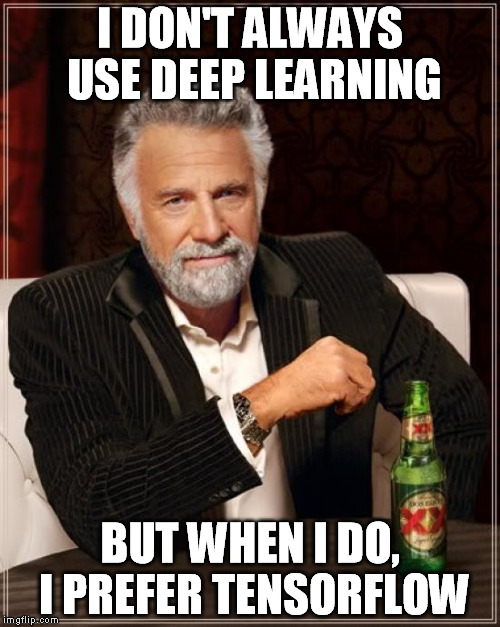

In [3]:
Image("i_dont_always_use_deep_learning.jpg", width=600)